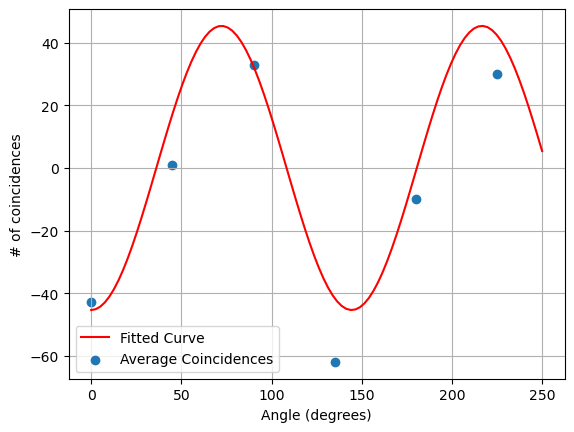

[-45.3868945   -2.49268152 536.96186453]


In [23]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

raw_angle = [0, 45, 90, 135, 180, 225]
raw_points = [494, 538, 570, 475, 527, 567]

def cosine(x, A, B, C):
    return A * np.cos(B*np.radians(x)) + C

initial_guess = [1,10,500] 
# Perform the curve fitting
params, covariance = curve_fit(cosine, raw_angle, raw_points, p0=initial_guess)

min_counts = min(raw_points)
max_counts = max(raw_points)
average_counts = (min_counts + max_counts) / 2
shift_value = - average_counts  # Negative sign for downward shift
params[2] -= np.radians(shift_value)  # Subtract shift value in radians


fitted_curve = cosine(np.linspace(0,250,100), *params)


plt.plot(np.linspace(0, 250, 100), fitted_curve-params[2], 'r-', label='Fitted Curve')
plt.scatter(raw_angle, raw_points-params[2], label='Average Coincidences')
plt.xlabel('Angle (degrees)')
plt.ylabel('# of coincidences')
plt.legend()
plt.title('')
plt.grid(True)
plt.show()
print(params)
